# Intension behind this Experiment is only for mlpackaging

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split

In [5]:
df = pd.read_csv("./loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.shape

(4269, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [13]:
df.duplicated().sum()

0

In [19]:
df.select_dtypes(exclude="O")

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [15]:
# categorical columns
df.select_dtypes("O")

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


In [18]:
# removing blank spaces from columns
cols= [x.strip() for x in df.columns]
df.columns= cols
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [41]:
# split x & Y
X= df.drop(["loan_status", "loan_id"], axis=1)
y= df['loan_status']

In [42]:
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object

In [43]:
#apply domain knowledge as preprocessing
# preprocessing as per the domain knowledge
X['total_assets_value'] =  X['residential_assets_value'] + X['commercial_assets_value'] + X['luxury_assets_value'] + X['bank_asset_value']

# drop the Columns
X.drop(columns=['residential_assets_value','commercial_assets_value', 'luxury_assets_value','bank_asset_value' ],inplace=True)

In [44]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,2,Graduate,No,9600000,29900000,12,778,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,17000000
2,3,Graduate,No,9100000,29700000,20,506,57700000
3,3,Graduate,No,8200000,30700000,8,467,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,55000000


In [45]:
X.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [46]:
X.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [47]:
y.unique()

array([' Approved', ' Rejected'], dtype=object)

In [49]:
X['education'] = X['education'].str.strip()
X['self_employed'] = X['self_employed'].str.strip()
y = y.str.strip()
y

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [50]:
X.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
import pandas as pd
def separate_column_types(df):
    numerical_columns = []
    string_columns = []

    for col in df.columns:
        if df[col].dtype == "object":
            string_columns.append(col)
        else :
            numerical_columns.append(col)

    return numerical_columns, string_columns

num_cols, cat_cols = separate_column_types(X)

print("Numerical columns:", num_cols)
print("String columns:", cat_cols)

Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'total_assets_value']
String columns: ['education', 'self_employed']


In [35]:
# Transformation to Binary
def transform_categorical_to_binary(df, columns_to_transform):
  """
  Transforms specified categorical columns in a DataFrame to binary (0 and 1).

  Args:
    df: The DataFrame to modify.
    columns_to_transform: A dictionary where keys are column names and values are 
                          lists of the original categorical values to map to 1.

  Returns:
    The modified DataFrame with transformed columns.
  """

  for column_name, positive_values in columns_to_transform.items():
    df[column_name] = df[column_name].apply(lambda x: 1 if x in positive_values else 0)

  return df

columns_to_transform = {
  'education': ['Graduate'],
  'self_employed': ['Yes']
}

transformed_X = transform_categorical_to_binary(X, columns_to_transform)
transformed_X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,7400000
4265,0,0,1,3300000,11300000,20,559,20000000
4266,2,0,0,6500000,23900000,18,457,39000000
4267,1,0,0,4100000,12800000,8,780,28800000


In [52]:
num_cols

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'total_assets_value']

In [53]:
y

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [63]:
# log transformation
log_cols = ['income_annum','loan_amount','total_assets_value']
transformed_X[log_cols] = np.log(transformed_X[log_cols])


In [64]:
transformed_X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,2,1,0,2.777407,2.845686,12,778,2.875903
1,0,0,1,2.723037,2.792204,8,417,2.812334
2,3,1,0,2.774074,2.845296,20,506,2.883166
3,3,1,0,2.767554,2.847219,8,467,2.878081
4,5,0,1,2.778688,2.833323,20,382,2.880481


In [65]:
Y = y.map({"Approved":1, "Rejected":0})
Y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [66]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,Y,test_size=0.3, random_state=0)

In [67]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
1023,4,0,1,2.632667,2.700033,4,554,2.776755
728,1,0,0,2.710666,2.770541,16,312,2.832589
133,4,0,1,2.755724,2.800167,8,479,2.881591
2255,1,0,0,2.772686,2.832835,6,380,2.884507
1044,3,1,1,2.687234,2.733336,12,895,2.814754
...,...,...,...,...,...,...,...,...
1033,3,1,0,2.588116,2.638902,2,752,2.730566
3264,5,0,1,2.609508,2.678103,12,363,2.749836
1653,3,0,1,2.751863,2.831595,12,684,2.885537
2607,4,0,0,2.740963,2.794179,18,786,2.846649


In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Dell\.conda\envs\torch_trans\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [70]:
y_pred_test = log.predict(X_test)
acc = accuracy_score(y_test,y_pred_test)
print(f"Accuracy is {acc}")

Accuracy is 0.9133489461358314


In [80]:
import seaborn as sns

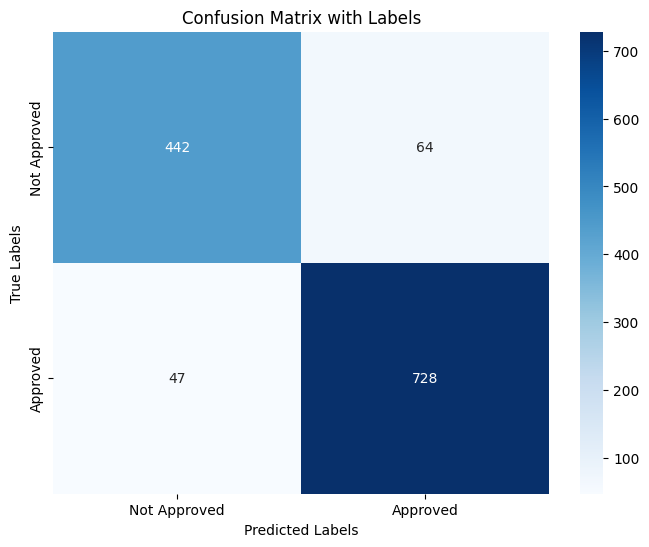

In [85]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
# Display using Matplotlib and Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', "Approved"], yticklabels=['Not Approved', "Approved"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [88]:
(442/(442+64)) # recall , (442/(442+47)) #precision

print(f"recall for class 0 : {(442/(442+64))}")
print(f"precision for class 0 : {(442/(442+47))}")

recall for class 0 : 0.8735177865612648
precision for class 0 : 0.9038854805725971


In [92]:
((0.8735177865612648 * 0.9038854805725971) / (0.9038854805725971 +  0.8735177865612648))* 2 

0.8884422110552764

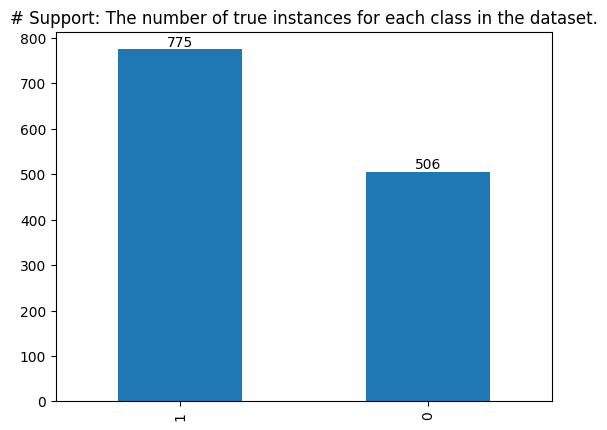

In [103]:
# Support: The number of true instances for each class in the dataset.
ax = y_test.value_counts().plot(kind="bar")
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title("# Support: The number of true instances for each class in the dataset.")
plt.show()

In [ ]:
# Support: The number of true instances for each class in the dataset.

In [93]:
print(classification_report(y_true=y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       506
           1       0.92      0.94      0.93       775

    accuracy                           0.91      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281



# Serialization & Deserialization

In [104]:
# serialization & deserialization
import joblib
joblib.dump(log,"my_trained_model_v1.pkl")

['my_trained_model_v1.pkl']

In [105]:
#deserialization
final_model = joblib.load("my_trained_model_v1.pkl")

In [106]:
final_model.intercept_, final_model.coef_

(array([-2.3448034]),
 array([[-0.01788933,  0.05724032, -0.0114385 , -1.94978318,  0.50562121,
         -0.14942662,  0.02348231, -1.56675187]]))

In [107]:
log.intercept_, log.coef_

(array([-2.3448034]),
 array([[-0.01788933,  0.05724032, -0.0114385 , -1.94978318,  0.50562121,
         -0.14942662,  0.02348231, -1.56675187]]))

# packages and modules

In [109]:
import package_1 #dir contains code files

In [114]:
from package_1 import file1, file2
from package_1.file1 import print_something

In [115]:
print_something(), file2.print_something()

contains from package_1/file1.py
contains from package_1/file2.py


(None, None)

# Adding the system path

In [116]:
import sys

In [117]:
sys.path

['c:\\Users\\Dell\\.conda\\envs\\torch_trans\\python39.zip',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\DLLs',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans',
 '',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib\\site-packages',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib\\site-packages\\win32',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\Dell\\.conda\\envs\\torch_trans\\lib\\site-packages\\setuptools\\_vendor']

In [118]:
## add system path
# sys.path.append('/Users/addd/Desktop/') # mac or linux

# Getting parent Directory

In [121]:
import package_1

In [122]:
package_1.__file__

In [124]:
print(package_1.__file__)

None


In [125]:
import pathlib
# pathlib.Path(package_1.__file__).resolve().parent

# create custom DataTransformer

In [127]:
# Key thing --> Inherit - BaseEstimator, TransformerMixin
# implement fit and transform
# accept input with __init__ method

from sklearn.base import BaseEstimator,TransformerMixin

class DemoTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        return X

In [126]:
from sklearn.base import BaseEstimator,TransformerMixin

class AddColumns(BaseEstimator,TransformerMixin):
    def __init__(self, columns_transform):
        self.columns_transform = columns_transform
        self.new_col = "new_column"
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X[self.new_col] = X[self.columns_transform].sum(axis=1)
        return X

In [128]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,(10,5)), columns=list("abcde"))
df

,a,b,c,d,e
0,68,7,8,68,47
1,46,51,84,77,52
2,33,79,49,98,85
3,97,77,99,53,81
4,20,22,87,75,99
5,74,23,94,45,75
6,83,94,6,85,87
7,99,5,56,3,31
8,71,62,33,91,1
9,2,75,38,46,94


In [129]:
column_add = AddColumns(["a","b","c","d"])
column_add.fit(df)

AddColumns(columns_transform=['a', 'b', 'c', 'd'])

In [132]:
column_add.columns_transform

['a', 'b', 'c', 'd']

In [133]:
column_add.transform(df)

,a,b,c,d,e,new_column
0,68,7,8,68,47,151
1,46,51,84,77,52,258
2,33,79,49,98,85,259
3,97,77,99,53,81,326
4,20,22,87,75,99,204
5,74,23,94,45,75,236
6,83,94,6,85,87,268
7,99,5,56,3,31,163
8,71,62,33,91,1,257
9,2,75,38,46,94,161


In [134]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0,100,(10,2)),columns=["A",'B'])
df.iloc[1,0] = np.nan
df.iloc[2,1] = np.nan
df.iloc[3,1] = np.nan
df.iloc[4,0] = np.nan
df

,A,B
0,44.0,47.0
1,NaN,67.0
2,67.0,NaN
3,83.0,NaN
4,NaN,87.0
5,70.0,88.0
6,88.0,12.0
7,58.0,65.0
8,39.0,87.0
9,46.0,88.0


In [135]:
mean_imputer = MeanImputer(variables=["A",'B'])
mean_imputer.fit(df)

NameError: name 'MeanImputer' is not defined